# Categorical Data
https://www.tutorialspoint.com/python_pandas/python_pandas_categorical_data.htm

Often in real-time, data includes the text columns, which are repetitive. Features like gender, country, and codes are always repetitive. These are the examples for categorical data.

Categorical variables can take on only a limited, and usually fixed number of possible values. Besides the fixed length, categorical data might have an order but cannot perform numerical operation. Categorical are a Pandas data type.

The categorical data type is useful in the following cases −

 1   A string variable consisting of only a few different values. Converting such a string variable to a categorical variable will save some memory.

 2   The lexical order of a variable is not the same as the logical order (“one”, “two”, “three”). By converting to a categorical and specifying an order on the categories, sorting and min/max will use the logical order instead of the lexical order.

  3  As a signal to other python libraries that this column should be treated as a categorical variable (e.g. to use suitable statistical methods or plot types).

Object Creation

Categorical object can be created in multiple ways. The different ways have been described below −
1. category: By specifying the dtype as "category" in pandas object creation
2. pd.Categorical: By using the standard pandas Categorical constructor, we can create a category object. 

 
By specifying the dtype as "category" in pandas object creation.

In [2]:
import pandas as pd 
import numpy as np

In [3]:
# category object
s = pd.Series(["a","b","c","a"], dtype="category")
s
# The number of elements passed to the series object is four, 
# but the categories are only three. 
# Observe the same in the output Categories.

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): [a, b, c]

In [4]:
#Using the standard pandas Categorical constructor, 
#we can create a category object.
cat = pd.Categorical(['a', 'b', 'c', 'a', 'b', 'c'])
print (cat)

[a, b, c, a, b, c]
Categories (3, object): [a, b, c]


pandas.Categorical(val, categories = None, ordered = None, dtype = None)


In [5]:
cat=pd.Categorical(['a','b','c','a','b','c','d']
                          , ['c', 'b', 'a'])
print (cat) 
# The second argument  ['c', 'b', 'a'] signifies the categories. 
# Thus, any value which is not present in the categories 
# will be treated as NaN.

[a, b, c, a, b, c, NaN]
Categories (3, object): [c, b, a]


In [6]:
cat=pd.Categorical(['a','b','c','a','b','c','d'], ['c', 'b', 'a'],ordered=True)
print (cat)

[a, b, c, a, b, c, NaN]
Categories (3, object): [c < b < a]


In [7]:
cat = pd.Categorical(["a", "c", "c", np.nan], categories=["b", "a", "c"])
df = pd.DataFrame({"cat":cat, "s":["a", "c", "c", np.nan]})
print (df)
print (df.describe(),'\n')
print (df["cat"].describe(),'\n' )
print ('count() = ', df["cat"].count() )

   cat    s
0    a    a
1    c    c
2    c    c
3  NaN  NaN
       cat  s
count    3  3
unique   2  2
top      c  c
freq     2  2 

count     3
unique    2
top       c
freq      2
Name: cat, dtype: object 

count() =  3


In [8]:
# get the categories of the object.
s = pd.Categorical(["a", "c", "c", np.nan], categories=["b", "a", "c"])
print (s.categories )

Index(['b', 'a', 'c'], dtype='object')


In [9]:
# obj.ordered command is used to get the order of the object. 
cat = pd.Categorical(["a", "c", "c", np.nan], categories=["b", "a", "c"])
print (cat.ordered)
#The function returned false because we haven't specified any order.

False


In [10]:
#Initial categories [a,b,c] are updated by the s.cat.categories property of the object.
s = pd.Series(["a","b","c","a"], dtype="category")
print (s)
s.cat.categories = ["Group %s" % g for g in s.cat.categories]
print (s)
print (s.cat.categories )

0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): [a, b, c]
0    Group a
1    Group b
2    Group c
3    Group a
dtype: category
Categories (3, object): [Group a, Group b, Group c]
Index(['Group a', 'Group b', 'Group c'], dtype='object')


In [11]:
s = pd.Series(["a","b","c","a"], dtype="category")
print (s[3])
print (s)
s = s.cat.add_categories('fgrrt4]')
print (s)
print (s.cat.categories) 

a
0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): [a, b, c]
0    a
1    b
2    c
3    a
dtype: category
Categories (4, object): [a, b, c, fgrrt4]]
Index(['a', 'b', 'c', 'fgrrt4]'], dtype='object')


In [12]:
#Removing Categories 
s = pd.Series(["a","b","c","a"], dtype="category")
print ("Original object:")
print (s)

print ("After removal:")
print (s.cat.remove_categories("a"))

Original object:
0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): [a, b, c]
After removal:
0    NaN
1      b
2      c
3    NaN
dtype: category
Categories (2, object): [b, c]


# Comparison of Categorical Data

Comparing categorical data with other objects is possible in three cases −

    comparing equality (== and !=) to a list-like object (list, Series, array, ...) of the same length as the categorical data.

    all comparisons (==, !=, >, >=, <, and <=) of categorical data to another categorical Series, when ordered==True and the categories are the same.

    all comparisons of a categorical data to a scalar.

 

In [13]:

cat = pd.Series([1,2,3]).astype("category", categories=[1,2,3], ordered=True)
cat1 = pd.Series([2,2,2]).astype("category", categories=[1,2,3], ordered=True)

print (cat>cat1) 

0    False
1    False
2     True
dtype: bool


C:\Users\rockman\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


# Visualization
https://www.tutorialspoint.com/python_pandas/python_pandas_visualization.htm

In [14]:
m=np.random.randn(10,4)
index=pd.date_range('1/1/2000',  periods=10)
print(m,'\n\n')
print(index)
df = pd.DataFrame(m,index , columns=list('ABCD'))
print(df)
df.plot( )

[[-0.86833812  1.42963599  0.94423287 -0.26463004]
 [ 1.99012879 -0.40901002 -1.1592949   0.13590875]
 [ 0.54803497  0.42798293 -0.55590293  1.5383139 ]
 [-0.35051253 -0.39353532 -0.93457146 -1.27177701]
 [ 0.33926106 -1.61025126 -0.26945957  1.49007518]
 [-0.59615187 -0.78237116 -0.34798432 -0.26109969]
 [-0.98451758 -0.01524267 -0.32085772  0.74732322]
 [-0.58690176 -0.8890988   0.03525998  2.72588607]
 [ 1.27235397  1.71476371 -0.92458067 -0.63252515]
 [ 0.84117394 -0.63405505 -0.7459679  -2.3088215 ]] 


DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10'],
              dtype='datetime64[ns]', freq='D')
                   A         B         C         D
2000-01-01 -0.868338  1.429636  0.944233 -0.264630
2000-01-02  1.990129 -0.409010 -1.159295  0.135909
2000-01-03  0.548035  0.427983 -0.555903  1.538314
2000-01-04 -0.350513 -0.393535 -0.934571 -1.2717

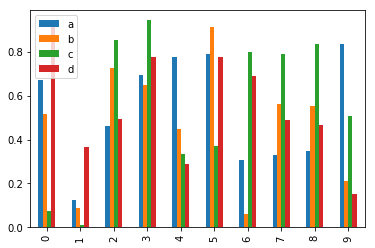

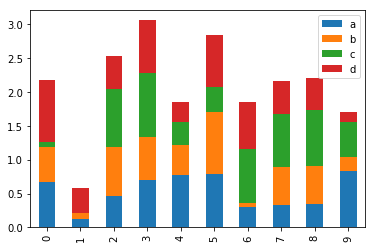

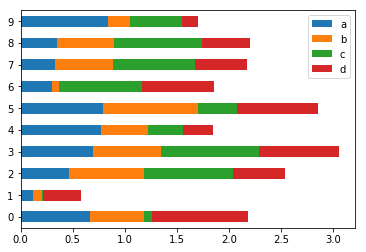

In [15]:
#Bar Plot 
df = pd.DataFrame(np.random.rand(10,4),columns=['a','b','c','d'])
df.plot.bar()
df.plot.bar(stacked=True)# stacked bar
df.plot.barh(stacked=True)#horizontal bar 

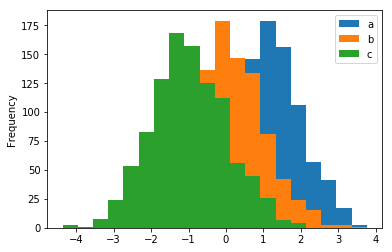

In [16]:
df = pd.DataFrame({'a':np.random.randn(1000)+1,'b':np.random.randn(1000),'c':
np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])

df.plot.hist(bins=20) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017907321D30>,
      dtype=object)

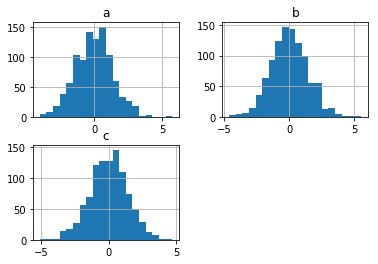

In [17]:
# plot different histograms for each column
df=pd.DataFrame({'a':np.random.randn(1000)+1,'b':np.random.randn(1000),'c':
np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])

df.diff().hist(bins=20)

# Box Plots

Boxplot can be drawn calling Series.box.plot() and DataFrame.box.plot(), or DataFrame.boxplot() to visualize the distribution of values within each column.

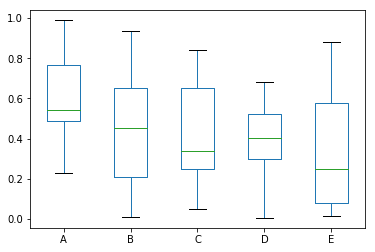

In [18]:
# boxplot representing five trials of 10 observations of a uniform random variable on [0,1)
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot.box()
 

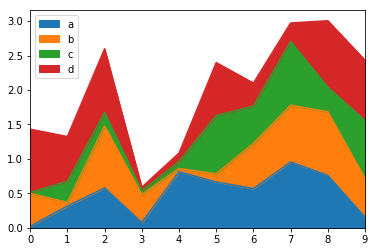

In [19]:
#Area Plot
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.area() 

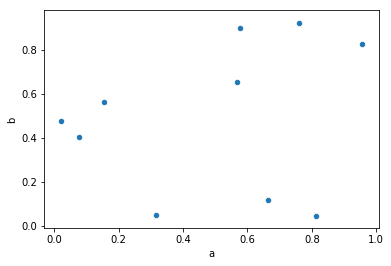

In [20]:
 #Scatter Plot
df.plot.scatter(x='a', y='b')    

[2.02249397 2.87170287 0.52839788 2.05416603]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000017907A122E8>],
      dtype=object)

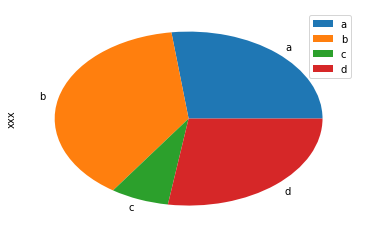

In [28]:
#Pie Chart
da = 3 * np.random.rand(4)
index=['a', 'b', 'c', 'd']
print(da)
df = pd.DataFrame(da, index, columns=['xxx'])
df.plot.pie(subplots=True)